In [1]:
# standard data science imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# data prep imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# stats import
from scipy import stats

# modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model evaluation imports
from sklearn.metrics import \
accuracy_score,\
recall_score,\
precision_score,\
confusion_matrix,\
classification_report

# ignore warning import
import warnings
warnings.filterwarnings("ignore")

# custom modules
import os
import env
import acquire_telco as a
import prepare as p

In [2]:
df = a.get_telco_data()

this file exists, reading csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_support 

In [240]:
df.monthly_charges.mean()

64.76169246059918

In [23]:
list[list.contract_type == 'Month-to-month'].monthly_charges.mean()

66.39849032258064

In [24]:
list[list.contract_type == 'Two year'].monthly_charges.mean()

60.770412979351036

In [25]:
list[list.contract_type == 'One year'].monthly_charges.mean()

65.04860828241684

In [31]:
monthly_contract = df[df.contract_type == 'Month-to-month']

In [138]:
len(monthly_churned)/len(df)

0.2349850915802925

In [236]:
df.contract_type.value_counts(normalize=True)

contract_type
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

In [137]:
monthly_churned = monthly_contract[monthly_contract.churn == 'Yes']

In [35]:
#average tenure for a month to month contract customer who churned

monthly_contract[monthly_contract.churn == 'Yes'].tenure.mean()

14.016918429003022

In [40]:
one_year_contract = df[df.contract_type == 'One year']

In [133]:
one_year_churn = one_year_contract[one_year_contract.churn == 'Yes'].count()

In [151]:
churned

2       Month-to-month
3       Month-to-month
4       Month-to-month
18            One year
19      Month-to-month
             ...      
7020    Month-to-month
7023    Month-to-month
7036    Month-to-month
7037    Month-to-month
7039    Month-to-month
Name: contract_type, Length: 1869, dtype: object

In [142]:
churned = df.contract_type[df.churn == 'Yes']

In [153]:
m2m_churned = churned[df.contract_type == 'Month-to-month']

In [154]:
one_year_churned = churned[df.contract_type == 'One year']

In [155]:
two_year_churned = churned[df.contract_type == 'Two year']

In [148]:
contract_type_churned_percentage = df.contract_type[df.churn == 'Yes'].value_counts(normalize=True)

In [214]:
contract_type_churned_percentage

contract_type
Month-to-month    0.885500
One year          0.088818
Two year          0.025682
Name: proportion, dtype: float64

In [184]:
monthly_churned_percent = len(m2m_churned)/len(monthly_contract)

In [182]:
one_year_churned_percent = len(one_year_churned)/len(one_year_contract)

In [183]:
one_year_churned_percent

0.11269517990495587

In [180]:
two_year_churned_percent = len(two_year_churned)/len(two_year_contract)

In [181]:
two_year_churned_percent

0.02831858407079646

In [127]:
one_year_contract[one_year_contract.churn == 'Yes'].tenure.mean()

44.963855421686745

In [212]:
one_and_two_year_contract = df.contract_type[df.contract_type != 'Month-to-month']

In [220]:
one_and_two_year_contract_percent = len(one_and_two_year_contract_churned)/len(one_and_two_year_contract)

In [217]:
one_and_two_year_contract_churned= one_and_two_year_contract[df.churn == 'Yes']

In [225]:
long_contract_c_w_ts = one_and_two_year_contract_churned[df.tech_support == 'Yes']

In [226]:
long_contract_w_ts = one_and_two_year_contract[df.tech_support == 'Yes']

In [228]:
long_contract_c_w_ts_percent = len(long_contract_c_w_ts)/len(long_contract_w_ts)

In [229]:
long_contract_c_w_ts_percent

0.07574654042243263

In [46]:
two_year_contract = df[df.contract_type == 'Two year']

In [239]:
two_year_churn = two_year_contract[two_year_contract.churn == 'Yes'].tenure.mean()
two_year_churn

61.270833333333336

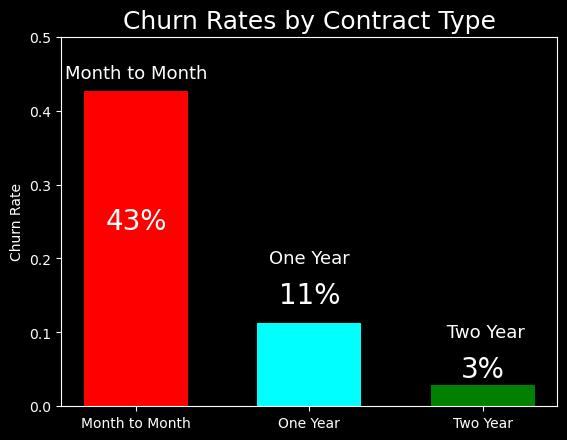

In [204]:
plt.style.use('dark_background')
bar_width = 0.6  # Increase the width of the bars
plt.bar([0, 1, 2], [monthly_churned_percent,one_year_churned_percent, two_year_churned_percent], width=bar_width, label='Churn Rate', color=('red','cyan','green'))
plt.xticks([0, 1, 2], ['Month to Month', 'One Year', 'Two Year'])
plt.title('Churn Rates by Contract Type', fontsize=18)
plt.ylabel('Churn Rate')
plt.ylim(0, 0.5)
plt.text(0, 0.45, f'Month to Month', ha='center', va='center', fontsize=13, color='white')
plt.text(0, 0.25, f'{monthly_churned_percent:.0%}', ha='center', va='center', fontsize=20, color='white')

# Add text to the second column of the plot
plt.text(1, 0.20, f'One Year', ha='center', va='center', fontsize=13, color='white')
plt.text(1, 0.15, f'{one_year_churned_percent:.0%}', ha='center', va='center', fontsize=20, color='white')

plt.text(2, 0.10, f' Two Year', ha='center', va='center', fontsize=13, color='white')
plt.text(2, 0.05, f'{two_year_churned_percent:.0%}', ha='center', va='center', fontsize=20, color='white')

plt.show()

Average tenure by contract type

In [44]:
monthly_contract.tenure.mean()

18.036645161290323

In [43]:
one_year_contract.tenure.mean()

42.044806517311606

In [47]:
two_year_contract.tenure.mean()

56.73510324483776

Average monthly charges by contract type

In [48]:
monthly_contract.monthly_charges.mean()

66.39849032258064

In [49]:
one_year_contract.monthly_charges.mean()

65.04860828241684

In [50]:
two_year_contract.monthly_charges.mean()

60.770412979351036

Overall average monthly charges

In [51]:
df.monthly_charges.mean()

64.76169246059918

Difference in months between 2 year and month to month contract

In [52]:
two_year_contract.tenure.mean() - monthly_contract.tenure.mean()

38.698458083547436

Average amount of money made per customer for 2 year contract over month to month


In [53]:
(df.monthly_charges.mean()) * (two_year_contract.tenure.mean() - monthly_contract.tenure.mean())

2506.1776411060873

Average amount of money made per customer for 1 year contract over month to month



In [54]:
(df.monthly_charges.mean()) * (one_year_contract.tenure.mean() - monthly_contract.tenure.mean())

1554.809162283092

In [60]:
df.contract_type[df.churn == 'Yes'].value_counts()

contract_type
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

possible earnings if month to month switched to one year or two year contract
(month to month who churned - one year who churned) x (average earnings based on tenure)

In [61]:
#one year
(1655 - 166) * 1555

2315395

In [62]:
#two year
(1655 - 48) * 2506

4027142

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_support 

average cost with/without tech support

In [66]:
#average monthly charges with tech support
df.monthly_charges[df.tech_support == 'Yes'].mean()

80.68013698630138

In [67]:
df.monthly_charges[df.tech_support == 'No'].mean()

74.5866829830118

average cost with/without online security

In [68]:
df.monthly_charges[df.online_security == 'Yes'].mean()

78.83873204556711

In [69]:
df.monthly_charges[df.online_security == 'No'].mean()

75.69306746712407

average cost with/without online backup

In [71]:
df.monthly_charges[df.online_backup == 'Yes'].mean()

83.08159736517085

In [72]:
df.monthly_charges[df.online_backup == 'No'].mean()

71.93800194300518

average cost with/without streaming tv

In [73]:
df.monthly_charges[df.streaming_tv == 'Yes'].mean()

88.73673808644256

In [74]:
df.monthly_charges[df.streaming_tv == 'No'].mean()

65.38768683274021

average cost with/without streaming movies

In [75]:
df.monthly_charges[df.streaming_movies == 'Yes'].mean()

88.47571376281113

In [76]:
df.monthly_charges[df.streaming_tv == 'No'].mean()

65.38768683274021

In [79]:
df.contract_type

0             One year
1       Month-to-month
2       Month-to-month
3       Month-to-month
4       Month-to-month
             ...      
7038          One year
7039    Month-to-month
7040    Month-to-month
7041          Two year
7042          Two year
Name: contract_type, Length: 7043, dtype: object

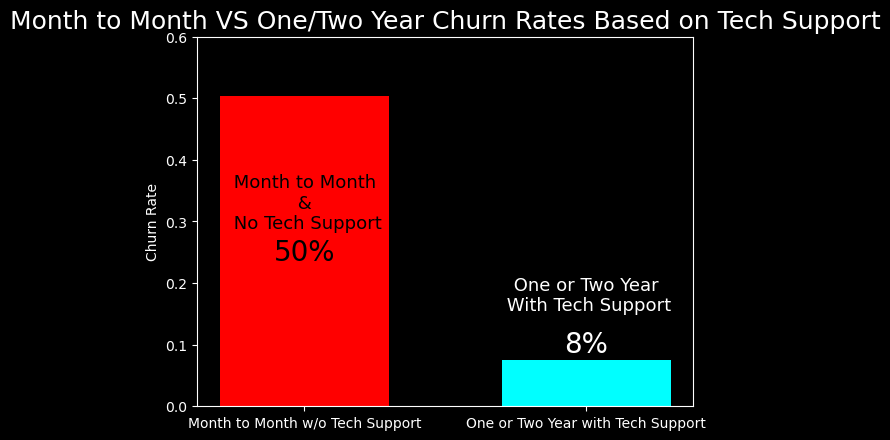

In [235]:
plt.style.use('dark_background')
bar_width = 0.6  # Increase the width of the bars
plt.bar([0, 1], [mtm_no_ts_churn_rate, long_contract_c_w_ts_percent], width=bar_width, label='Churn Rate', color=('red','cyan'))
plt.xticks([0, 1], ['Month to Month w/o Tech Support','One or Two Year with Tech Support'])
plt.title('Month to Month VS One/Two Year Churn Rates Based on Tech Support', fontsize=18)
plt.ylabel('Churn Rate')
plt.ylim(0, 0.6)
plt.text(0, 0.33, f' Month to Month \n & \n No Tech Support', ha='center', va='center', fontsize=13, color='black')
plt.text(0, 0.25, f'{mtm_no_ts_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')

# Add text to the second column of the plot
plt.text(1, 0.18, f' One or Two Year \n With Tech Support', ha='center', va='center', fontsize=13, color='white')
plt.text(1, 0.10, f'{long_contract_c_w_ts_percent:.0%}', ha='center', va='center', fontsize=20, color='white')
plt.show()

In [86]:
mtm_no_ts = monthly_contract[monthly_contract['tech_support'] == 'No']
mtm_no_ts_churn_rate = mtm_no_ts['churn'].value_counts(normalize=True)['Yes']
mtm_no_ts_churn_rate

0.503731343283582

In [87]:
mtm_with_ts = monthly_contract[monthly_contract['tech_support'] == 'Yes']
mtm_with_ts_churn_rate = mtm_with_ts['churn'].value_counts(normalize=True)['Yes']
mtm_with_ts_churn_rate

0.30700447093889716

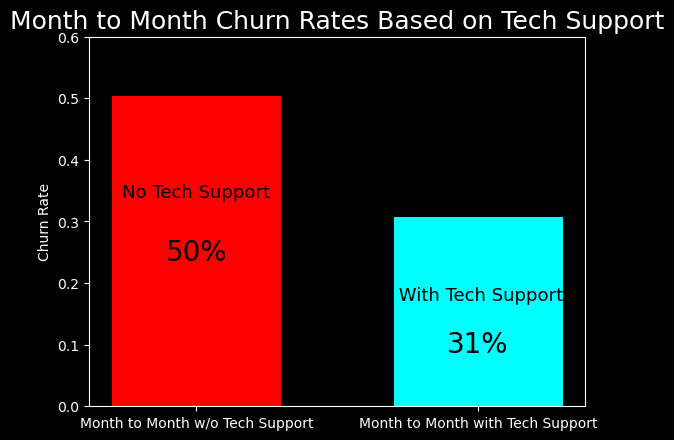

In [205]:
plt.style.use('dark_background')
bar_width = 0.6  # Increase the width of the bars
plt.bar([0, 1], [mtm_no_ts_churn_rate, mtm_with_ts_churn_rate], width=bar_width, label='Churn Rate', color=('red','cyan'))
plt.xticks([0, 1], ['Month to Month w/o Tech Support', 'Month to Month with Tech Support'])
plt.title('Month to Month Churn Rates Based on Tech Support', fontsize=18)
plt.ylabel('Churn Rate')
plt.ylim(0, 0.6)
plt.text(0, 0.33, f'No Tech Support\n', ha='center', va='center', fontsize=13, color='black')
plt.text(0, 0.25, f'{mtm_no_ts_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')

# Add text to the second column of the plot
plt.text(1, 0.18, f' With Tech Support', ha='center', va='center', fontsize=13, color='black')
plt.text(1, 0.10, f'{mtm_with_ts_churn_rate:.0%}', ha='center', va='center', fontsize=20, color='black')
plt.show()